# Ejercicio de Optica
## • Fisica en la transmision a travez de una fibra optica

### Ejercicio:
####     Una fibra tiene un índice de refracción de 1.6 para el núcleo y 1.4 para el revestimiento. Si el rayo incidente toca la frontera con un ángulo de incidencia de 30º, calcule el ángulo derefracción con el que se desvía el rayo en el revestimiento. ###

# Snell's Law

\begin{eqnarray}
    µ_1 \sin\delta_1 &=&  \sin\delta_2 \\
    \sin\delta_1 &=& µ_2/µ_1 \sin\delta_2 \\
    \delta_1 &=& \arcsin (µ_2/µ_1 \sin\delta_2) \\
\end{eqnarray}
## El angulo critico se calcula para 
\begin{eqnarray}
\delta_2 &=& 90 
\end{eqnarray}
## Por lo tanto 
\begin{eqnarray}
\delta_1 &=& \arcsin (µ_2/µ_1 \sin90)\\
\delta_1 &=& \arcsin (µ_2/µ_1)\\
\end{eqnarray}

## Datos:
\begin{eqnarray}
µ_1 &=& 1.6 \\
µ_2 &=& 1.4 \\
α &=& 30° \\
\\
\delta_1 &=& \arcsin (1.4/4.6) = 17.71° \\
\end{eqnarray}

#### Importo las librerias necesarias

In [28]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D    
import math
from matplotlib.patches import Arc  
from matplotlib.widgets import Slider, Button, RadioButtons

#### Defino las constantes que vamos a usar

In [29]:
ejex = 0
ejey = 0
core_radio = 2
cladding_radio = 3
cable_long = 20
core_u = 1.6
cladding_u = 1.4
angle_ray = 30

#### Defino los objetos y las funciones que voy a necesitar

In [30]:
class Linea:
    def __init__(self, cable, angle, point, color):
        self.cable = cable
        self.angle = angle
        self.x0 = point[0]
        self.y0 = point[1]

        if point[1] < core_radio and point[1] > -core_radio:
            if angle == 0:
                self.xf = 50
                self.yf = 0
            else:
                # Si el inicio es en el core
                if angle > 0:
                    self.yf = core_radio
                if angle < 0:
                    self.yf = -core_radio
                self.xf = core_radio/math.tan(math.radians(angle))


        elif point[1] == core_radio:
            if angle <= self.cable.get_angulo_critico():
                # Rebota
                self.yf = -core_radio
                self.xf = (point[0] + 
                           math.fabs((core_radio + core_radio)/
                                     math.tan(math.radians(angle))))
                self.angle = -angle
            else:
                # Refracta
                self.yf = cladding_radio
                self.xf = (point[0] + 
                           math.fabs(
                               core_radio/
                               math.tan(math.radians(
                                   self.cable.angulo_refraccion(angle)))))
                self.angle = self.cable.angulo_refraccion(angle)

        elif point[1] == -core_radio:
            if angle <= self.cable.get_angulo_critico():
                # Rebota
                self.yf = core_radio
                self.xf = (point[0] + math.fabs((core_radio + core_radio)/
                                                math.tan(math.radians(angle))))
                self.angle = -angle
            else:
                # Refracta
                self.yf = -cladding_radio
                self.xf = (point[0] +
                           math.fabs(core_radio /
                                     math.tan(math.radians(
                                         self.cable.angulo_refraccion(angle)))))
                self.angle = self.cable.angulo_refraccion(angle)
            
        self.color = color
        self.draw_line()

    def draw_line(self):
        ax.add_line(Line2D([self.x0, self.xf],
                           [self.y0, self.yf], color=self.color))

    def rebotar(self, cable):
        if (self.angle > 0 and self.angle < 180 and
            self.angle > cable.get_angulo_critico()):
            new_line = Linea(cable.angulo_refraccion(self.angle),
                             [self.xf, self.yf], 'blue')
        else:
            new_line = Linea(self.angle, [self.xf, self.yf], 'green')
        return new_line

class Cable:
    def __init__(self, core_radio, cladding_radio, core_u, cladding_u,
                 core_color='0.5', cladding_color='#2ca02c'):
        self.core_radio = core_radio
        self.cladding_radio = cladding_radio
        self.core_color = core_color
        self.cladding_color = cladding_color
        self.core_u = core_u
        self.cladding_u = cladding_u

    def draw_cable(self):
        plt.axhspan(self.core_radio*(-1), self.core_radio, xmin=0, xmax=1,
                    facecolor=self.core_color, alpha=0.4)
        plt.axhspan(self.core_radio, self.cladding_radio, xmin=0, xmax=1,
                    facecolor=self.cladding_color, alpha=0.4)
        plt.axhspan(self.core_radio*(-1), self.cladding_radio*(-1), xmin=0,
                    xmax=1, facecolor='#2ca02c', alpha=0.4)
    
        
    def angulo_refraccion(self, angle):
        return (90-math.degrees(math.asin(math.sin(math.radians(90 - angle)) *
                                          (self.core_u/self.cladding_u))))

        
    def get_angulo_critico(self):
        return 90 - math.degrees(math.asin((self.cladding_u/self.core_u)))
    
    def draw_critic_line(self):
        linea_critica = Linea(self, self.get_angulo_critico(), [0,0], 'green')



class Grafico:
    def __init__(self, x0, y0, xf, yf):
        self.x0 = x0
        self.y0 = y0
        self.xf = xf
        self.yf = yf
    
    def draw_grafico(self):
        ax.set_aspect('equal')
        ax.set_aspect('auto')
        ax.set_xlim(self.x0, self.xf)
        ax.set_ylim(self.y0, self.yf)
        plt.grid(True)

# Manos a la obra

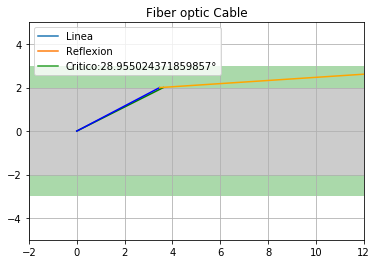

In [31]:
# Inicializo el grafico
fig = plt.figure()
ax = fig.add_subplot(111)

# Dibujo el grafico
grafico = Grafico(-2, -5, 12, 5)
grafico.draw_grafico()

# Dibujo el cable
cable = Cable(core_radio, cladding_radio, core_u=core_u, cladding_u=cladding_u)
cable.draw_cable()
cable.draw_critic_line()

linea_nueva = Linea(cable, angle_ray, [0,0], 'blue')

linea_nueva_refrac = Linea(cable, linea_nueva.angle ,
                           [linea_nueva.xf, linea_nueva.yf], 'orange')
if not linea_nueva_refrac.angle > 0:
    linea_nueva_refrac2 = Linea(cable, linea_nueva_refrac.angle ,
                                [linea_nueva_refrac.xf, linea_nueva_refrac.yf],
                                'orange')

# Genero el grafico

ax.plot(0 , 0, label='Linea')
ax.plot(0 , 0, label='Reflexion')
ax.plot(0 , 0, label='Critico:' + str(cable.get_angulo_critico()) + '°')

plt.title('Fiber optic Cable')
ax.legend()
plt.show()

#### Cuando no supera el angulo critico, se ve como refracta en un angulo menor al que tenia de incidencia.
#### Si utilizamos un angulo de incidencia menor (20°), al superarlo, se produce una completa reflexion interna, por lo que el rayo de luz rebota

Angulo de entrada critico: 28.955024371859857


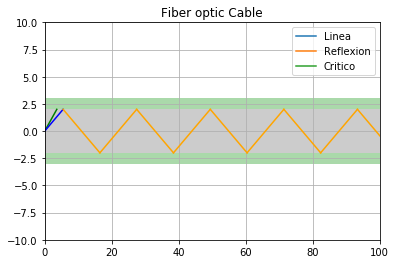

In [32]:
# Inicializo el grafico
fig = plt.figure()
ax = fig.add_subplot(111)

# Dibujo el grafico
grafico = Grafico(0, -10, 100, 10)
grafico.draw_grafico()

# Dibujo el cable
cable = Cable(core_radio, cladding_radio, core_u=core_u, cladding_u=cladding_u)
print('Angulo de entrada critico:', cable.get_angulo_critico())
cable.draw_cable()
cable.draw_critic_line()


linea_nueva = Linea(cable, 20, [0,0], 'blue')

linea_nueva_refrac = Linea(cable, linea_nueva.angle ,
                           [linea_nueva.xf, linea_nueva.yf],
                           'orange')
if not linea_nueva_refrac.angle > 0:
    
    x_inicial = linea_nueva_refrac.xf
    y_inicial = linea_nueva_refrac.yf
    angulo_inicial = linea_nueva_refrac.angle
    while x_inicial < 100:
        linea_nueva_refrac_aux = Linea(cable, angulo_inicial ,
                                       [x_inicial, y_inicial],
                                       'orange')
        x_inicial =linea_nueva_refrac_aux.xf
        y_inicial = linea_nueva_refrac_aux.yf
        angulo_inicial = linea_nueva_refrac_aux.angle


            
            
ax.plot(0 , 0, label='Linea')
ax.plot(0 , 0, label='Reflexion')
ax.plot(0 , 0, label='Critico')

plt.title('Fiber optic Cable')
ax.legend()

# Genero el grafico
plt.show()

 Fuentes

 - http://www.ciscopress.com/articles/article.asp?p=170740

 - https://www.youtube.com/watch?v=pTakwkDtBDw

 - https://www.youtube.com/watch?v=MrJswUU143M

 - https://www.youtube.com/watch?v=02wPSDOXMhc

 - https://www.samm.com/calculating-fiber-loss-and-maximum-distance-estimates

 - https://www.youtube.com/watch?v=W8uoqsEWX1M

 - https://www.seas.es/blog/automatizacion/reflexion-y-refraccion-de-la-luz-en-transmisiones-de-fibra-optica/